In [31]:
# import simplesbml
import math,random
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [32]:
with open('fission_yeast.param','r') as f:
#     print([float(x.rstrip('\n')) for x in f.readlines()])
    cstval=[float(x.rstrip('\n')) for x in f.readlines()];
    print(cstval)
    print(cstval.__len__()
         )

[0.05, 0.001, 0.01, 0.001, 0.0, 0.0, 0.01, 0.01, 0.01, 0.001, 0.01, 0.001, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.001, 1.0, 0.2, 1.0, 0.2, 0.0, 0.0, 5.0, 50.0, 500.0, 1000.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.25, 0.25, 0.1, 0.01, 2.0, 0.02, 0.02, 0.75, 1.5, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.1, 2.0, 100.0, 0.0, 1.0, 0.05, 0.25, 0.25, 0.08, 0.0, 0.0, 0.0, 1.0, 40.0, 40.0, 0.0, 40.0, 1.0, 0.0, 10.0, 1.0, 0.005, 0.1, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.3, 0.0, 0.05, 0.5, 4.0, 0.05]
85


In [33]:
%matplotlib inline
execfile('rep_util.py')

In [34]:
###
##initiate the parameters

def init_params(sp='Scere'):
    global varname,cstname,cstval,vardict,cstdict
    varname=['mass','actcycA','actcycB','actcycE','cycA','cycB','cycE','cdh1','cki','triB','preMPF','APCp','cdc20A','cdc20T'];
    cstname=['J20','Ja20','Ja25','JaAPC','Jafb','Jafi','Jah1','Jatf','Jawee','Ji20','Ji25','JiAPC','Jifb','Jifi','Jih1','Jitf','Jiwee','J14di',
              'k25p','k25pp','ka20','ka25','kaAPC','kafb','kafi','kah1p','kah1pp','kasa','kasb','kase','katfp','katfpp','katfppp','katfpppp','kaweep','kaweepp','kd20','kdap','kdapp','kdappp','kdbp','kdbpp','kdbppp','kdep','kdepp','kdeppp','kdepppp','kdia','kdib','kdie','kdip','kdipp','kdippp','kdipppp','kdippppp','ki20','ki25p','ki25pp','kiAPC','kifb','kifip','kifipp','kih1p','kih1pp','kih1ppp','kih1pppp','kih1ppppp','kitfp','kitfpp','kitfppp','kiwee','ks20p','ks20pp','ksap','ksapp','ksbp','ksbpp','ksep','ksepp','ksip','ksipp','kweep','kweepp',
              'n','cycD0','thres'];
    #    # budding yeast
    if sp == 'Scere':
        cstval=[100,10,0,0.1,0.1,10,.03,.01,0,10,0,.1,.1,10,.03,.01,0,.0833,0,0,1,0,.1,1,6,.01,.8,50,65,0,0,.76,.76,3.8,0,0,.05,.01,.16,0,.003,.4,
                 .15,.12,0,0,0,.06,.05,0,.02,.2,.9,.12,.66,.05,0,0,.15,.15,.008,.05,.001,.64,.1,.032,.01,.6,8,0,0,.001,10,.0008,.005,.004,.04,0,.15,.036,.24,0,0,1,.108,.2];
    ##     fission yeast
    if sp == 'Spombe':
        cstval=[0.05, 0.001, 0.01, 0.001, 0.0, 0.0, 0.01, 0.01, 0.01, 0.001, 0.01, 0.001, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.001, 1.0, 0.2, 1.0, 0.2, 0.0, 0.0, 5.0, 50.0, 500.0, 1000.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.25, 0.25, 0.1, 0.01, 2.0, 0.02, 0.02, 0.75, 1.5, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.1, 2.0, 100.0, 0.0, 1.0, 0.05, 0.25, 0.25, 0.08, 0.0, 0.0, 0.0, 1.0, 40.0, 40.0, 0.0, 40.0, 1.0, 0.0, 10.0, 1.0, 0.005, 0.1, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.3, 0.0, 0.05, 0.5, 4.0, 0.05,.1];

    cstname.append('MDT');
    cstval.append(150.);
    cstname.append('cdh1T');
    cstval.append(1.)
    print(varname.__len__())
    print(cstname.__len__())
    print(cstval.__len__())
    vardict={x:varname.index(x) for x in varname};
    cstdict={x:cstname.index(x) for x in cstname};
# init_params();
# len()

B=lambda a1,a2,a3,a4 : a2 - a1 + a3 * a2 + a4 * a1;
def GK(a1,a2,a3,a4):
    b=B(a1,a2,a3,a4);
    gk = 2 * a4 * a1 / ( b + np.sqrt( np.square(b) - 4 * (a2 - a1) * a4 * a1 )) ;
    if np.isnan(gk):
        gk=0; 
    return(gk)
# GK=lambda a1,a2,a3,a4 : 2 * a4 * a1 / ( B(a1,a2,a3,a4) )
print(GK(1,2,3,4))
np.square(1)


cmd_unpack_var='(' + ','.join(varname)+') ='+'state;';
cmd_unpack_cst='(' + ','.join(cstname)+') ='+'params;';
cmd_pack_statedot='statedot=(' + ','.join('d'+x for x in varname)+')';

cmd_calc_wkcst='''
cycD = cycD0 * mass;
Vatf = katfp + katfpp * actcycA+ katfppp * actcycE + katfpppp * cycD;
tfE = 
'''

def fsdot_ccycle(state,t,params):
    exec(cmd_unpack_var+cmd_unpack_cst);
#     exec(cmd_calc_wkcst);
    
    cycD = cycD0 * mass;
    Vatf = katfp + katfpp * actcycA+ katfppp * actcycE + katfpppp * cycD;
    tfE = GK(Vatf,    kitfp + kitfpp * actcycB+ kitfppp * actcycA,    Jatf,    Jitf);
    Vde = kdep + kdepp * actcycE + kdeppp * actcycA + kdepppp * actcycB;
    Vda = kdap + kdapp * cdc20A + kdappp * cdc20T;
    cdc14 = cdc20A;
    tfI = GK(kafi * cdc14, kifip + kifipp * actcycB, Jafi, Jifi);
    Vsi = ksip + ksipp * tfI;
    Vdi = (kdip + kdipp * actcycA + kdippp * actcycB + kdipppp * actcycE + kdippppp * cycD)/(1 + cdc14/J14di);
    cdk1_cycB_cki = cycB - actcycB - preMPF;
    cdk1P_cycB = cycB - actcycB - triB;
    triA = cycA - actcycA;
    triE = cycE - actcycE;
    freecki = cki - triB -triA -triE;
    tfB = GK(kafb * actcycB, kifb, Jafb, Jifb);
    Vsb = ksbp + ksbpp * tfB;
    Vdb = kdbp + kdbpp * cdh1 + kdbppp * cdc20A;
    wee1 = GK( kaweep + kaweepp * cdc14, kiwee * actcycB , Jawee, Jiwee);
    Vwee = kweep + kweepp * wee1;
    cdc25 = GK(ka25 * actcycB, ki25p + ki25pp * cdc14,  Ja25,  Ji25);
    V25 = k25p + k25pp * cdc25;
    dactcycA = (ksap+ksapp*tfE) * mass + (Vdi+kdia) * triA - (Vda+kasa*freecki)*actcycA;
    dactcycB = Vsb*mass + V25*(cycB - triB -actcycB) + (kdib + Vdi)*(cycB - preMPF -actcycB) - (Vdb+Vwee+kasb*freecki)*actcycB;
    dactcycE = (ksep+ksepp*tfE)*mass + (Vdi+kdie)*triE - (Vde + kase*freecki) * actcycE;
    dcycA = (ksap + ksapp*tfE)*mass - Vda*cycA;
    dcycB = Vsb*mass -Vdb * cycB;
    dcycE = (ksep+ksepp*tfE)*mass -Vde*cycE;

#     dcdh1 = (kah1p + kah1pp*cdc14)*(1-cdh1)/(Jah1+1-cdh1) - (kih1p+kih1pp*actcycA+kih1ppp*actcycB+kih1pppp*actcycE+kih1ppppp*cycD)*cdh1/(Jih1+cdh1);
    dcdh1 = (kah1p + kah1pp*cdc14)*(cdh1T-cdh1)/(Jah1+cdh1T-cdh1) - (kih1p+kih1pp*actcycA+kih1ppp*actcycB+kih1pppp*actcycE+kih1ppppp*cycD)*cdh1/(Jih1+cdh1);
    dcki = Vsi - Vdi*cki;
    dtriB = kasb*(cycB - triB)*freecki - (kdib+Vdb+Vdi)*triB;
    dpreMPF = Vwee*(cycB - preMPF) - (V25+Vdb)*preMPF;
    dAPCp = kaAPC*actcycB*(1.-APCp)/(JaAPC+1.-APCp) - kiAPC*APCp/(JiAPC+APCp);
    dcdc20A = ka20*APCp*(cdc20T-cdc20A)/(Ja20+cdc20T-cdc20A) - (ki20/(Ji20+cdc20A) + kd20)*cdc20A;
    dcdc20T = (ks20p + ks20pp* actcycB ** n )/ (J20**n + actcycB**n) - kd20*cdc20T;
#     print(dactcycB)
#     print(Vsb)
#     print(Vsb*mass + V25*(cycB - triB -actcycB) + (kdib + Vdi)*(cycB - preMPF -actcycB) - (Vdb+Vwee+kasb*freecki)*actcycB)
#     print(V25)
#     print(k25p + k25pp * cdc25)
#     print(cdc25)
#     print((ka25 * actcycB, ki25p + ki25pp * cdc14,  Ja25,  Ji25))
#     print(Ja25,Ji25)
    if actcycB > thres and (actcycB + dt * dactcycB ) < thres :
        dmass=-mass/2/dt;
    else:
        dmass=math.log(2)/MDT;
    
    exec(cmd_pack_statedot)
    return statedot
sdot_ccycle='''

cycD = cycD0 * mass;
Vatf = katfp + katfpp * actcycA+ katfppp * actcycE + katfpppp * cycD;
tfE = GK(Vatf,    kitfp + kitfpp * actcycB+ kitfppp * actcycA,    Jatf,    Jitf);
Vde = kdep + kdepp * actcycE + kdeppp * actcycA + kdepppp * actcycB;
Vda = kdap + kdapp * cdc20A + kdappp * cdc20T;
cdc14 = cdc20A;
tfI = GK(kafi * cdc14, kifip + kifipp * actcycB, Jafi, Jifi);
Vsi = ksip + ksipp * tfI;
Vdi = (kdip + kdipp * actcycA + kdippp * actcycB + kdipppp * actcycE + kdippppp * cycD)/(1 + cdc14/J14di);
cdk1_cycB_cki = cycB - actcycB - preMPF;
cdk1P_cycB = cycB - actcycB - triB;
triA = cycA - actcycA;
triE = cycE - actcycE;
freecki = cki - triB -triA -triE;
tfB = GK(kafb * actcycB, kifb, Jafb, Jifb);
Vsb = ksbp + ksbpp * tfB;
Vdb = kdbp + kdbpp * cdh1 + kdbppp * cdc20A;
wee1 = GK( kaweep + kaweepp * cdc14, kiwee * actcycB , Jawee, Jiwee);
Vwee = kweep + kweepp * wee1;
cdc25 = GK(ka25 * actcycB, ki25p + ki25pp * cdc14,  Ja25,  Ji25);
V25 = k25p + k25pp * cdc25;
dactcycA = (ksap+ksapp*tfE) * mass + (Vdi+kdia) * triA - (Vda+kasa*freecki)*actcycA;
dactcycB = Vsb*mass + V25*(cycB - triB -actcycB) + (kdib + Vdi)*(cycB - preMPF -actcycB) - (Vdb+Vwee+kasb*freecki)*actcycB;
dactcycE = (ksep+ksepp*tfE)*mass + (Vdi+kdie)*triE - (Vde + kase*freecki) * actcycE;
dcycA = (ksap + ksapp*tfE)*mass - Vda*cycA;
dcycB = Vsb*mass -Vdb * cycB;
dcycE = (ksep+ksepp*tfE)*mass -Vde*cycE;

#     dcdh1 = (kah1p + kah1pp*cdc14)*(1-cdh1)/(Jah1+1-cdh1) - (kih1p+kih1pp*actcycA+kih1ppp*actcycB+kih1pppp*actcycE+kih1ppppp*cycD)*cdh1/(Jih1+cdh1);
dcdh1 = (kah1p + kah1pp*cdc14)*(cdh1T-cdh1)/(Jah1+cdh1T-cdh1) - (kih1p+kih1pp*actcycA+kih1ppp*actcycB+kih1pppp*actcycE+kih1ppppp*cycD)*cdh1/(Jih1+cdh1);
dcki = Vsi - Vdi*cki;
dtriB = kasb*(cycB - triB)*freecki - (kdib+Vdb+Vdi)*triB;
dpreMPF = Vwee*(cycB - preMPF) - (V25+Vdb)*preMPF;
dAPCp = kaAPC*actcycB*(1.-APCp)/(JaAPC+1.-APCp) - kiAPC*APCp/(JiAPC+APCp);
dcdc20A = ka20*APCp*(cdc20T-cdc20A)/(Ja20+cdc20T-cdc20A) - (ki20/(Ji20+cdc20A) + kd20)*cdc20A;
dcdc20T = (ks20p + ks20pp* actcycB ** n )/ (J20**n + actcycB**n) - kd20*cdc20T;
#     print(dactcycB)
#     print(Vsb)
#     print(Vsb*mass + V25*(cycB - triB -actcycB) + (kdib + Vdi)*(cycB - preMPF -actcycB) - (Vdb+Vwee+kasb*freecki)*actcycB)
#     print(V25)
#     print(k25p + k25pp * cdc25)
#     print(cdc25)
#     print((ka25 * actcycB, ki25p + ki25pp * cdc14,  Ja25,  Ji25))
#     print(Ja25,Ji25)
if actcycB > thres and (actcycB + dt * dactcycB ) < thres :
    dmass=-mass/2/dt;
else:
    dmass=math.log(2)/MDT;
    '''

steady_ccycle=[1.372816046654241,
 0.00505671608331352,
 0.0007454297165007661,
 1.6463209162565244,
 0.3014122824459352,
 0.04784638147640157,
 1.6463209162565244,
 0.0682937690858393,
 0.7955173456516715,
 0.047100951759900755,
 1.3710285462344074e-68,
 4.1983735446154505e-05,
 0.004664187328528269,
 0.04149338469610915]

0.37652461702


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:65: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


14
88
88


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:117: RuntimeWarning: Degrees of freedom <= 0 for slice
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:179: RuntimeWarning: divide by zero encountered in divide


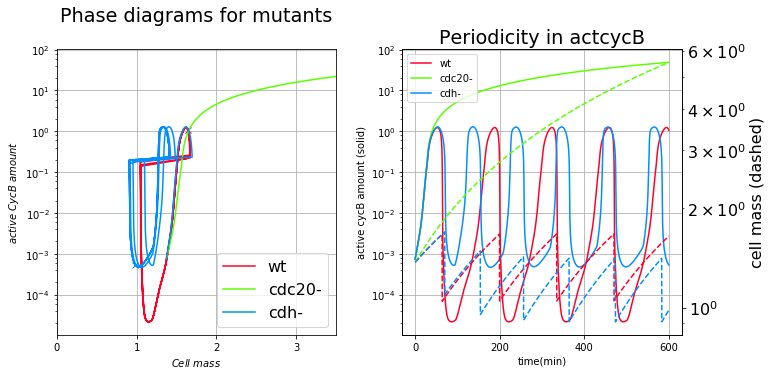

In [35]:
# %matplotlib notebook
figname='resources/ccycle.jpg';

tl='''Phase diagrams for mutants
'''
# $k_{mRNA degrade} = 10^{log\_par}$

tlR='''Amplitude and Period bifurcation
'''

exec(cmd_init_4figures)
plt.close('all')
fig1=plt.figure(figsize=[11,5.5])
axL=fig1.add_subplot(1,2,1)
ax3=fig1.add_subplot(1,2,2)
mpl.rcParams.update({'font.size': 16})
axL.set_title(tl);
axR.set_title(tlR);
ax32 = ax3.twinx()
# cm=plt.get_cmap('gist_rainbow')


#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
# lst=np.linspace(-6.,0,2);
lst=[];lbllst=[];
lbllst.append('wt')
lst.append('');
lbllst.append('cdc20-')
lst.append('''
MDT=1E2;
ks20p=0E2;
ks20pp=0E2;
''')

lbllst.append('cdh-')
lst.append('''
kah1p=0E2;
kah1pp=0E2;
''')


# lst.append('''
# cstval[cstdict['cdh1T']]=.1E5;
# cstval[cstdict['cdh1T']]=1.E0;
# cstval[cstdict['MDT']]=70.;''')
siz=len(lst)


cmd_onthefly_param='''
#### Temporary parameter/variable change
#k_dm = 10**log_par;    
#s = np.random.random(len(varname))
s=steady_ccycle;
param=cstval[:len(param)]
exec(cmd_unpack_all)
exec(lst[i])
log_par=i;
'''

#### timescales
t_max=10.*60.#### set the duration of the simulation
# unit=.05; ##### 1 for 1s, 60 for 1min etc
nt=1/.25; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
# lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
lc_step = int(20000*nt); 

exec(cmd_default_setup)
init_params('Scere')
param=cstval;
exec(cmd_name2dict)
exec(cmd_precompile_cmd)
### in case you want to fix m_LacI
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
# exec(cmd_name2dict)
# exec(cmd_precompile_cmd)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
#dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
# dot_det = sdot
cmd_calcrates=precompile(sdot_ccycle);
def dot_det(s,t,param):
    s[np.isnan(s)]=0;
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)



for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        exec(cmd_onthefly_param)
        exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all

        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
#     print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
#     lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    lbl=lbllst[i];
    xs=mass_obs ;ys=actcycB_obs;
    
    period,amplitude,avg=analyse(ys,debug=0,threshold=20) ### a custom function that detect the period.
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)

    x=max(int(period*nt),5);
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
#     axR.plot(log_par,period/60.,'bx',label=lbl);
#     axR2.plot(log_par,amplitude,'ro',label=lbl);
    ax3.plot(t_obs,ys,color=col,label=lbl);
    ax32.plot(t_obs,xs,'--',color=col,label=lbl);
    
    

axL.set_xlim(0,3.5)
# axL.set_ylim(1E-1,6000)
# axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlabel('${Cell\ mass}$')
axL.set_ylabel('${active\ CycB\ amount}$')

# cm=plt.get_cmap('gist_rainbow')
# Z = [[0,0],[0,0]]
# levels = [0,1];
# CS3 = axR.contourf(Z, levels, cmap=cm)
# cbar=plt.colorbar(CS3,ax=axL)
# cbar.set_label('$log\_par$', rotation=270)
# plt.colorbar( [0,1],ax=axL)
# norm = mpl.colors.Normalize(vmin=-2, vmax=3)
# cb = mpl.colorbar.ColorbarBase(axL, cmap=cm, norm=norm, spacing='proportional')
# plt.show(fig1)

# plt.colorbar(ax=axL)
axL.legend()
# axR.set_xscale('log')
# axR.set_yscale('log')
# axR.set_xlim(1,1E4)
# axR.set_ylim(1,1E4)
axR.legend()
axR.set_xlabel('$log\_par$')
axR.set_ylabel('$Period(min)$',color='b')
# axR2.set_ylabel('$Amplitude\ in \ No(LacI)$',color='r')
axR.set_ylim(0,300)

ax3.set_xlabel('time(min)');
ax3.set_ylabel('active cycB amount (solid)');
ax32.set_ylabel('cell mass (dashed)')
ax32.set_yscale('log')
ax3.set_yscale('log')
ax3.set_title('Periodicity in actcycB')
ax3.legend(loc=2,prop={'size':10})

axL.grid(True)
axR.grid(True)
ax3.grid(True)
plt.tight_layout()
plt.savefig(figname,dpi=300)


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


14
88
88


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:97: RuntimeWarning: Degrees of freedom <= 0 for slice


log_par = -2.0, period estimate: 600.500000, amplitude:23.246470, mean_LacI:13.342425
log_par = -1.22222222222, period estimate: 600.500000, amplitude:10.894673, mean_LacI:7.374290
log_par = -0.444444444444, period estimate: 600.500000, amplitude:3.970927, mean_LacI:2.822762
log_par = 0.333333333333, period estimate: 150.125000, amplitude:1.438574, mean_LacI:0.296583
log_par = 1.11111111111, period estimate: 66.722222, amplitude:0.770476, mean_LacI:0.229988
log_par = 1.88888888889, period estimate: 120.100000, amplitude:0.407202, mean_LacI:0.032577
log_par = 2.66666666667, period estimate: 150.125000, amplitude:0.458685, mean_LacI:0.057532
log_par = 3.44444444444, period estimate: 200.166667, amplitude:0.491375, mean_LacI:0.065305
log_par = 4.22222222222, period estimate: 200.166667, amplitude:0.465643, mean_LacI:0.061537
log_par = 5.0, period estimate: 200.166667, amplitude:0.463102, mean_LacI:0.061282


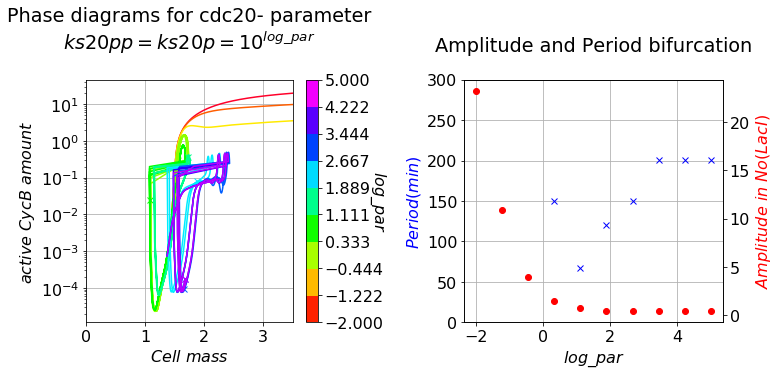

In [36]:
# %matplotlib notebook
figname='resources/ccycle_cdc20.jpg';

tl='''Phase diagrams for cdc20- parameter
$ks20pp=ks20p=10^{log\_par}$
'''

tlR='''Amplitude and Period bifurcation
'''

exec(cmd_init_4figures)
plt.close('all')
fig1=plt.figure(figsize=[11,5.5])
axL=fig1.add_subplot(1,2,1)
axR=fig1.add_subplot(1,2,2)
mpl.rcParams.update({'font.size': 16})
axL.set_title(tl);
axR.set_title(tlR);
axR2 = axR.twinx()
# cm=plt.get_cmap('gist_rainbow')


#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
lst=np.linspace(-2,5,10);
siz=len(lst)


cmd_onthefly_param='''
#### Temporary parameter/variable change
#k_dm = 10**log_par;    
#s = np.random.random(len(varname))
s=steady_ccycle;
param=cstval[:len(param)]
exec(cmd_unpack_all)
#kah1p=10**log_par;
#kah1pp=kah1p;
ks20p=10**log_par;
ks20pp=ks20p;
'''

#### timescales
t_max=10.*60.#### set the duration of the simulation
# unit=.05; ##### 1 for 1s, 60 for 1min etc
nt=1/.5; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
# lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
lc_step = int(20000*nt); 

exec(cmd_default_setup)
init_params('Scere')
exec(cmd_name2dict)
exec(cmd_precompile_cmd)
### in case you want to fix m_LacI
# parname = 'm_LacI'
# varname.pop(vardict[parname])
# cstname.append(parname)
# exec(cmd_name2dict)
# exec(cmd_precompile_cmd)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
#dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
# dot_det = sdot
cmd_calcrates=precompile(sdot_ccycle);
def dot_det(s,t,param):
    s[np.isnan(s)]=0;
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)



for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        exec(cmd_onthefly_param)
        exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all

        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
#     print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    xs=mass_obs;ys=actcycB_obs;
    period,amplitude,avg=analyse(ys,debug=1,threshold=1E-3) ### a custom function that detect the period.
    if period == t_max: period=0.;
    #     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)

    x=max(int(period*nt),5);
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    axL.plot(xs,ys,color=col,label=lbl)
    axL.plot(xs[-1],ys[-1],'x',color=col)
    axR.plot(log_par,period,'bx',label=lbl);
    axR2.plot(log_par,amplitude,'ro',label=lbl);
    

# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_xlim(0,3.5)
# axL.set_ylim(1E-1,6000)
# axL.set_xscale('log')
axL.set_yscale('log')
axL.set_xlabel('${Cell\ mass}$')
axL.set_ylabel('${active\ CycB\ amount}$')

cm=plt.get_cmap('gist_rainbow')
Z = [[0,0],[0,0]]
levels = lst;
CS3 = axR.contourf(Z, levels, cmap=cm)
cbar=plt.colorbar(CS3,ax=axL)
cbar.set_label('$log\_par$', rotation=270)
# plt.colorbar( [0,1],ax=axL)
# norm = mpl.colors.Normalize(vmin=-2, vmax=3)
# cb = mpl.colorbar.ColorbarBase(axL, cmap=cm, norm=norm, spacing='proportional')
# plt.show(fig1)

# plt.colorbar(ax=axL)
# axL.legend()
# axR.set_xscale('log')
# axR.set_yscale('log')
# axR.set_xlim(1,1E4)
# axR.set_ylim(1,1E4)
# axR.legend()
axR.set_xlabel('$log\_par$')
axR.set_ylabel('$Period(min)$',color='b')
axR2.set_ylabel('$Amplitude\ in \ No(LacI)$',color='r')
axR.set_ylim(0,300)

axL.grid(True)
axR.grid(True)

plt.tight_layout()
# plt.savefig('resources/k_dm_singlevar.jpg',dpi=300)
plt.savefig(figname,dpi=300)


In [37]:
max(s0)

1.6463209162565244

In [38]:
# init_params('S_cere');
init_params('S_pombe')
exec(cmd_name2dict)
exec(cmd_precompile_cmd)

cmd_calcrates=precompile(sdot_ccycle);
def dot_det(s,t,param):
    s[np.isnan(s)]=0;
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot_det = fsdot_ccycle
dt=.05
ts = np.arange(0, 500, dt);
s0 = np.random.random(len(varname))

# s0[0]=1.0
state=s0;
# exec(cmd_unpack_var)
# MDT
exec(cmd_pack_all)
print(len(varname),len(s0))
print(len(cstname),len(param))

ss=odeint(dot_det,s0,ts,args=(param,));
print('done')


14
88
90
(14, 14)
(88, 88)


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars


done


'actcycB'

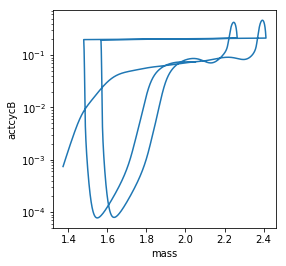

In [39]:
%matplotlib notebook
%matplotlib inline
plt.close('all');
fig=plt.figure(figsize=(4,4))
ax= plt.subplot();
# ax.plot(ts,ss[:,0])
xi=vardict['mass'];
# xi=vardict['cdc20A'];

yi=vardict['actcycB'];

ax.cla()
ax.plot(ss[:,xi],ss[:,yi]);

# ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
# ax.set_yscale("log")

ax.set_xlabel(varname[xi])
ax.set_ylabel(varname[yi])

varname[yi]
# state=(1,2,3)
# # eval(cmd_unpack_var)
# for i,cstname in enumerate(constname):
#      exec(cstname+'='+str(constval[i]))
# eval
# # MDT
# fig.draw()
